In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
api_key = "ef35b91a2dfad279bf53426de252a2b7"
base_url = "https://api.themoviedb.org/3"

In [3]:
endpoint = "/movie/popular"
url = f"{base_url}{endpoint}?api_key={api_key}&language=en-US&page=1"

In [4]:
response = requests.get(url)
data = response.json()
print(response)

<Response [200]>


In [5]:
all_movies = []

In [7]:
for page in range(1, 11):
    url = f"{base_url}{endpoint}?api_key={api_key}&language=en-US&page={page}"
    response = requests.get(url)
    data = response.json()

    for movies in data['results']:
        movie = {
            'id': movies['id'],
            'title': movies['title'],
            'release_date': movies['release_date'],
            'overview': movies['overview'],
            'popularity': movies['popularity'],
            'vote_average': movies['vote_average'],
            'vote_count': movies['vote_count']
        }
        all_movies.append(movie)

In [8]:
all_movies

[{'id': 668489,
  'title': 'Havoc',
  'release_date': '2025-04-24',
  'overview': "When a drug heist swerves lethally out of control, a jaded cop fights his way through a corrupt city's criminal underworld to save a politician's son.",
  'popularity': 575.1039,
  'vote_average': 6.596,
  'vote_count': 338},
 {'id': 1197306,
  'title': 'A Working Man',
  'release_date': '2025-03-26',
  'overview': "Levon Cade left behind a decorated military career in the black ops to live a simple life working construction. But when his boss's daughter, who is like family to him, is taken by human traffickers, his search to bring her home uncovers a world of corruption far greater than he ever could have imagined.",
  'popularity': 548.9128,
  'vote_average': 6.434,
  'vote_count': 502},
 {'id': 950387,
  'title': 'A Minecraft Movie',
  'release_date': '2025-03-31',
  'overview': "Four misfits find themselves struggling with ordinary problems when they are suddenly pulled through a mysterious portal in

In [9]:
Movies_Data = pd.DataFrame(all_movies)

In [10]:
Movies_Data.to_csv('movies.csv', index=False)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Popularity')

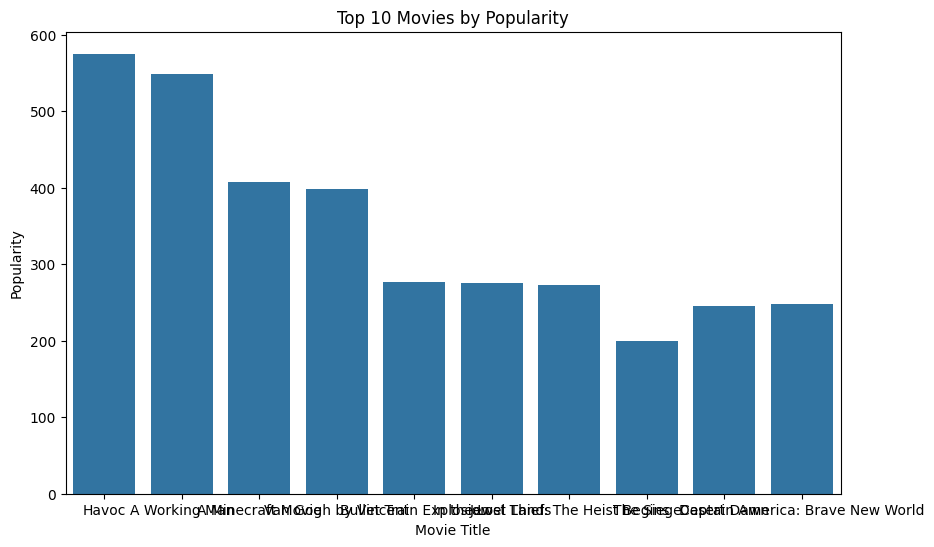

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=Movies_Data['title'][:10], y=Movies_Data['popularity'][:10])
plt.title('Top 10 Movies by Popularity')
plt.xlabel('Movie Title')
plt.ylabel('Popularity')

Text(0, 0.5, 'Vote Average')

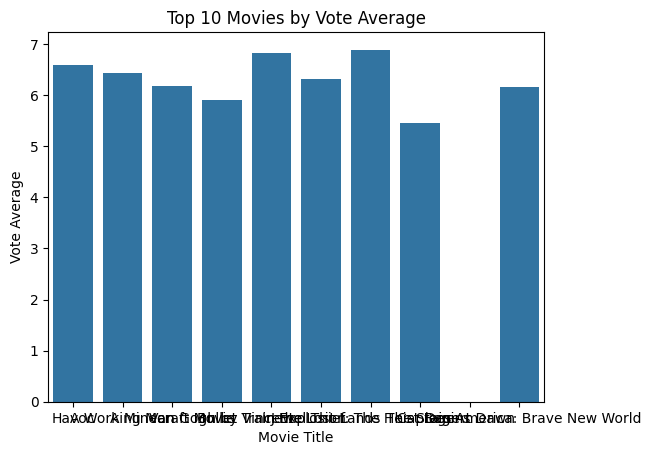

In [15]:
sns.barplot(x=Movies_Data['title'][:10], y=Movies_Data['vote_average'][:10])
plt.title('Top 10 Movies by Vote Average')
plt.xlabel('Movie Title')
plt.ylabel('Vote Average')

Text(0, 0.5, 'Vote Count')

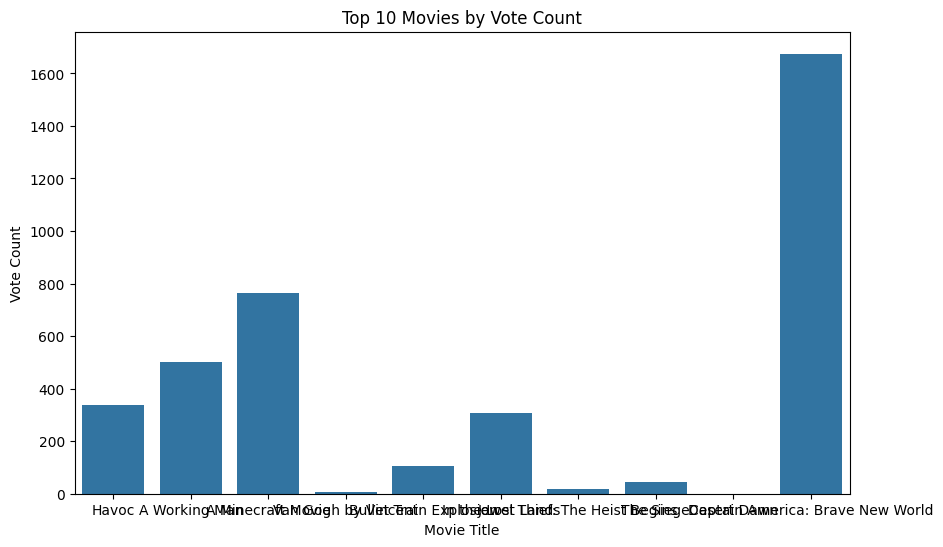

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=Movies_Data['title'][:10], y=Movies_Data['vote_count'][:10])
plt.title('Top 10 Movies by Vote Count')
plt.xlabel('Movie Title')
plt.ylabel('Vote Count')

Text(0, 0.5, 'Frequency')

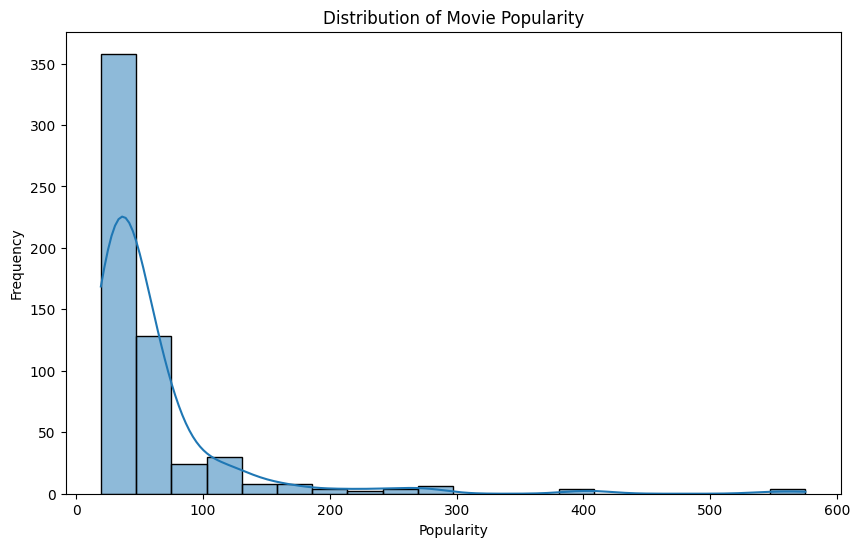

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(Movies_Data['popularity'], bins=20, kde=True)
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

In [18]:
Movies_Data.to_csv('movies_data.txt', sep='\t', index=False)